## Since the selected models previously did not work out as expected, 
## Hence 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensotflow.keras.losses import CategoricalCrossentropy
import numpy as np


# Paths
train_dir = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset/cleaned_dataset/train"
img_height, img_width = 128, 128  # Smaller image size for faster training
batch_size = 32



# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Compute Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Custom CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

# Adding label smoothing:
loss = CategoricalCrossentropy(label_smoothing=0.1)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=loss,
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
]

# Train
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights
)

# Save
model.save("Custom_CNN_Pet_Expression_Model.h5")


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 512 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.2406 - loss: 3.3529 - val_accuracy: 0.2422 - val_loss: 1.3907 - learning_rate: 1.0000e-04
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.3194 - loss: 2.3244 - val_accuracy: 0.2500 - val_loss: 1.4252 - learning_rate: 1.0000e-04
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.3502 - loss: 1.8491
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.3509 - loss: 1.8490 - val_accuracy: 0.2500 - val_loss: 1.7257 - learning_rate: 1.0000e-04
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.2974 - loss: 1.9956 - val_accuracy: 0.2500 - val_loss: 1.9881 - learning_rate: 3.0000e-05
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.3526 - loss: 1.6056
Epoch 5: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.3504 - 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Paths
train_dir = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset/cleaned_dataset/train"
img_height, img_width = 160, 160
batch_size = 8


# Augmented ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.5],
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Custom CNN: Deeper + bigger kernel early
model_2 = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile
model_2.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=3, verbose=1)
]

# Train
history_2 = model_2.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights
)

# Save model
model_2.save("Custom_CNN_Tuned_Model_Pet_Expression.h5")


Found 512 images belonging to 4 classes.


Found 128 images belonging to 4 classes.
Epoch 1/40


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - accuracy: 0.1990 - loss: 3.9535 - val_accuracy: 0.2500 - val_loss: 2.2024 - learning_rate: 1.0000e-04
Epoch 2/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.2899 - loss: 2.7717 - val_accuracy: 0.2500 - val_loss: 2.7009 - learning_rate: 1.0000e-04
Epoch 3/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - accuracy: 0.2998 - loss: 2.2656 - val_accuracy: 0.2500 - val_loss: 5.0138 - learning_rate: 1.0000e-04
Epoch 4/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.3097 - loss: 1.9442
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.3097 - loss: 1.9450 - val_accuracy: 0.2500 - val_loss: 3.6967 - learning_rate: 1.0000e-04
Epoch 5/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.3019 - loss: 1.8902 - val_accuracy: 0.2656 - val_loss: 2.2617 - learning_rate: 3.0000e-05
Epoch 6/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.2929 - 

In [7]:
print("Detected Classes:", train_generator.class_indices)
print("Number of Classes:", train_generator.num_classes)


Detected Classes: {'Angry': 0, 'Other': 1, 'Sad': 2, 'happy': 3}
Number of Classes: 4


In [8]:
print("Model output shape:", model.output_shape)

Model output shape: (None, 4)


In [10]:
import numpy as np
preds = model_2.predict(val_generator)
pred_labels = np.argmax(preds, axis=1)
true_labels = val_generator.classes

unique_preds = np.unique(pred_labels, return_counts=True)
print("Predicted Label Distribution:", dict(zip(*unique_preds)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Label Distribution: {np.int64(0): np.int64(121), np.int64(3): np.int64(7)}


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import LeakyReLU
import numpy as np

# Paths
train_dir = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset/cleaned_dataset/train"
img_height, img_width = 128, 128  # Smaller image size for faster training
batch_size = 32

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.4,
    shear_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.3, 1.7],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Compute Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

loss = CategoricalCrossentropy(label_smoothing=0.1)
# Custom CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', 
    input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Conv2D(64, (3,3)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=loss,
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
]

# Train
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights,
)

# Save
model.save("Custom_CNN_Pet_Expression_Model.h5")


Found 512 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.2364 - loss: 4.9829 - val_accuracy: 0.2656 - val_loss: 1.3933 - learning_rate: 1.0000e-04
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.3408 - loss: 4.8864 - val_accuracy: 0.2500 - val_loss: 1.4057 - learning_rate: 1.0000e-04
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.3303 - loss: 4.0860
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.3296 - loss: 4.0986 - val_accuracy: 0.2578 - val_loss: 1.4117 - learning_rate: 1.0000e-04
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 322ms/step - accuracy: 0.3684 - loss: 4.0383 - val_accuracy: 0.2500 - val_loss: 1.4590 - learning_rate: 3.0000e-05
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3852 - loss: 3.1360
Epoch 5: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - accuracy: 0.3849 - 

Before moving forward, Let's try removing the label smoothing, since it increases the noise levels, and also prevents the model to overfit, but in our case, the model is underfitting.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LeakyReLU
import numpy as np

# Paths
train_dir = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset/cleaned_dataset/train"
img_height, img_width = 128, 128  # Smaller image size for faster training
batch_size = 32

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.4,
    shear_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.3, 1.7],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Compute Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Custom CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', 
    input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Conv2D(64, (3,3)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
]

# Train
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights
)

# Save
model.save("Custom_CNN_Pet_Expression_Model.h5")


Found 512 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step - accuracy: 0.2808 - loss: 5.1605 - val_accuracy: 0.2656 - val_loss: 1.3978 - learning_rate: 1.0000e-04
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.3216 - loss: 4.7656 - val_accuracy: 0.2578 - val_loss: 1.4077 - learning_rate: 1.0000e-04
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.3278 - loss: 4.5410
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.3292 - loss: 4.5117 - val_accuracy: 0.2188 - val_loss: 1.7138 - learning_rate: 1.0000e-04
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.3089 - loss: 3.8945 - val_accuracy: 0.2500 - val_loss: 1.9673 - learning_rate: 3.0000e-05
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.3353 - loss: 3.0770
Epoch 5: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.3364 - loss: 3.080

 Trying to improve the accuracy even more with the custom CNN mode, /
 Till now only changes that took place in the baseline model: model, were implementing LeakyReLU, Dropout, Data Augmentation, Label Smoothing, Class weights.
 * Now we shall switch from Sequential to Functional Model (Just to test it out for better accuracy)
 * Normalizing input manually before flow i.e. : custom_preprocessing(image)
 * Getting a confusion matrix now.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Paths
train_dir = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset/cleaned_dataset/train"
img_height, img_width = 128, 128
batch_size = 32

# Data Augmentation - tuned
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25,
    rotation_range=10,  # reduced rotation
    width_shift_range=0.05,  # slightly reduced
    height_shift_range=0.05,
    zoom_range=0.15,  # slightly reduced zoom
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # more conservative brightness
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True  # changed from False to True
)

# Compute Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Custom CNN Model - lighter architecture to prevent underfitting
model = Sequential([
    Input(shape=(img_height, img_width, 3)),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.4),  # slightly reduced dropout
    Dense(128, activation='relu'),  # reduced dense layer size
    Dropout(0.2),  # slightly reduced dropout
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)  # more aggressive LR reduction
]

# Train
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights
)

# Save
model.save("Custom_CNN_Pet_Expression_Model_v2.keras")


Found 480 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Epoch 1/30


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.2713 - loss: 2.9566 - val_accuracy: 0.2625 - val_loss: 1.3828 - learning_rate: 1.0000e-04
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.4088 - loss: 1.8660 - val_accuracy: 0.2438 - val_loss: 1.4299 - learning_rate: 1.0000e-04
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.4472 - loss: 1.3327
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 0.4471 - loss: 1.3326 - val_accuracy: 0.2500 - val_loss: 1.6214 - learning_rate: 1.0000e-04
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.5195 - loss: 1.2140 - val_accuracy: 0.2500 - val_loss: 1.8087 - learning_rate: 5.0000e-05
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.4439 - loss: 1.2330
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.4440 - loss: 1.2328

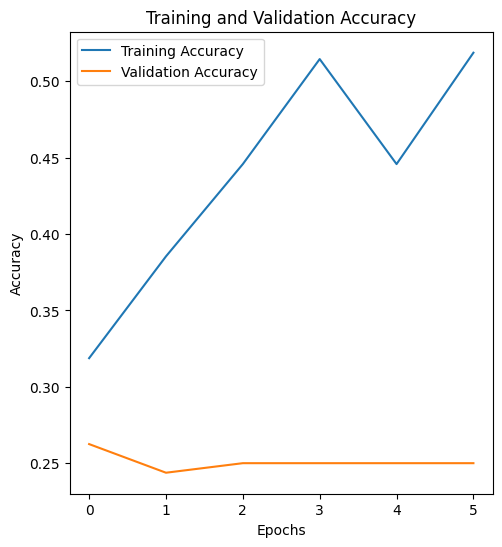

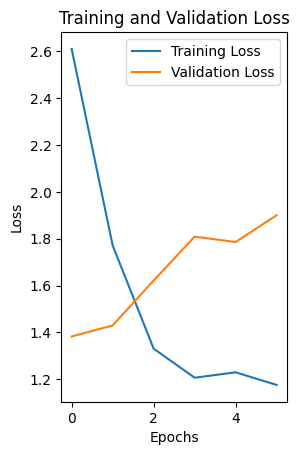

In [16]:
# Plotting te graphs for this new Custom CNN model:
import matplotlib.pyplot as plt
import numpy as np

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In the above model, the main changes that took place as below:
1. ImageDataGenerator: Reduced the augmentation intensity, in order to prevent generation of too unrealistic samples.
2. val_generator.shuffle: Changed from False to True, to precent the memorization from a small fixed validation set.
3. Model Architecture: Reduced the complexity of the model, like removing that one 1 convolution layer, smaller dense units, moderate dropout, hence reducing the changes of underfitting and improve generalization.
4. Dropout: Lowered the value slightly from .5 to .4 and .3 to .2, to preserve more learning in limited data.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

train_dir = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset/cleaned_dataset/train"
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.20
seed = 42

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=seed
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=seed
)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), padding='same'),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights
)

model.save("Custom_CNN_Pet_Expression_Final.keras")


Found 512 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Epoch 1/30


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.2546 - loss: 2.7638 - val_accuracy: 0.2500 - val_loss: 1.4210 - learning_rate: 1.0000e-04
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.3152 - loss: 1.7032 - val_accuracy: 0.2500 - val_loss: 1.7866 - learning_rate: 1.0000e-04
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.4714 - loss: 1.2609
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.4703 - loss: 1.2617 - val_accuracy: 0.2500 - val_loss: 2.5345 - learning_rate: 1.0000e-04
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.4683 - loss: 1.1980 - val_accuracy: 0.2500 - val_loss: 3.2152 - learning_rate: 5.0000e-05
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.4811 - loss: 1.1666
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.4804 - loss: 1.1681

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Classification Report:
               precision    recall  f1-score   support

       Angry       0.25      1.00      0.40        32
       Other       0.00      0.00      0.00        32
         Sad       0.00      0.00      0.00        32
       happy       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

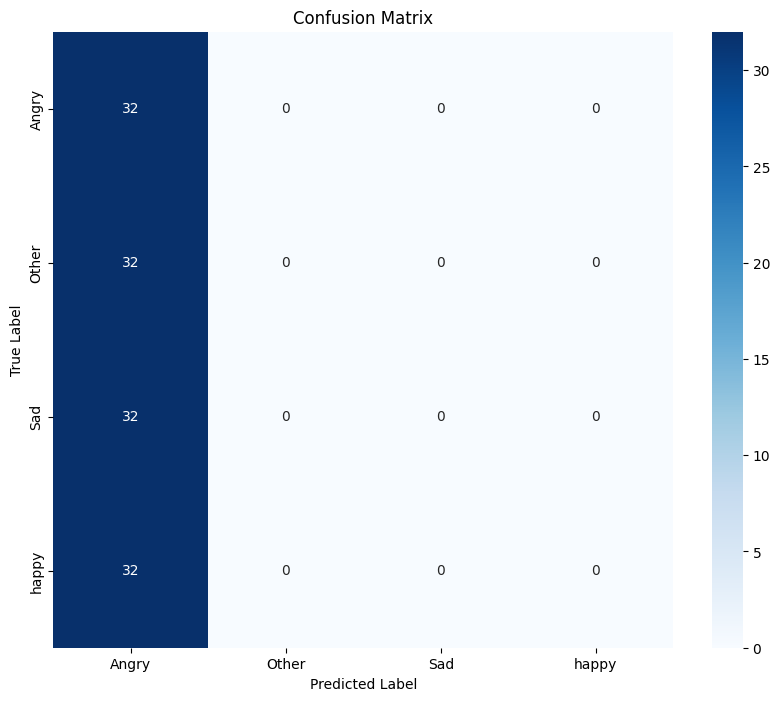

In [20]:
# Creating a classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get predictions   
preds = model.predict(val_generator)
pred_labels = np.argmax(preds, axis=1)
true_labels = val_generator.classes
# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=list(val_generator.class_indices.keys()))
print("Classification Report:\n", report)
# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(val_generator.class_indices.keys()),
            yticklabels=list(val_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Noticed that with a dataset this small, the accuracy tops at just 50 to 52% maximum, 
Therefore, we need to just increase the size of dataset that's used for training the model, and similarly for the validation data.